In [55]:
import numpy as np
import copy
import pickle

from scipy import ndimage
from BaselineRemoval import BaselineRemoval
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy import signal
from scipy.fft import fft, ifft
from math import *

plt.rcParams['figure.figsize'] = (20.0, 10.0)
# plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['figure.dpi'] = 500
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [310]:
file_location = "../data/Raman_Mouse/corrected_4_wavenumbers/"
# file_location = "../data/Green_excitation/corrected_4_wavenumbers/"

filenames = np.load(f"{file_location}FileNames.npy")
with open(f"{'/'.join(file_location.split('/')[:-2])}/Sample_labels.pickle", 'rb') as f:
    labels = pickle.load(f)
labels = {l.split(".")[0]: val for l, val in labels.items()}

wavenumbers = np.load(f"{file_location}Wavenumbers.npy")
    
data = []
for f in filenames:
    x = np.load(f"{file_location}{f.split('.')[0]}.npy")
    data.append(((x.reshape(-1,x.shape[-1])).reshape(x.shape), labels[f.split(".")[0]]))

In [311]:
def split_signal(x):
    x = img[0].reshape(-1, img[0].shape[-1])
    n = np.random.randint(x.shape[0])
    n = 85
    
    mu, sigma, scale = -836.1111111111111, 279.07679703451214, 1071926
   
    
    plt.plot(wavenumbers, x[n])
    plt.plot(wavenumbers, gaussian(wavenumbers, mu, sigma, scale))
    plt.plot(wavenumbers, pareto(wavenumbers, wavenumbers[0], 50, x[n,0], 1, 1))
    plt.show()

mu,sigma = 5,1
alpha, beta = 1,3
gamma = 2

def exp(x):
    return np.exp(-np.abs(x-5)/2)

def exp2(x):
    return np.exp(-0.5 * ((x-mu)/sigma)**2)

def gaussian(x, mu, sigma, scale):
    x = scale * np.exp(-0.5* ((x - mu) / sigma)**2)
    return x * (x > 1)

# def gamma(x):
#     return x**(alpha-1) * np.exp(-beta * x) * beta**alpha / factorial(alpha)

def pareto(x, mu, sigma, scale, gamma=1, alpha=1):
    return scale * (1 + ((x-mu)/sigma)**gamma)**(-alpha)



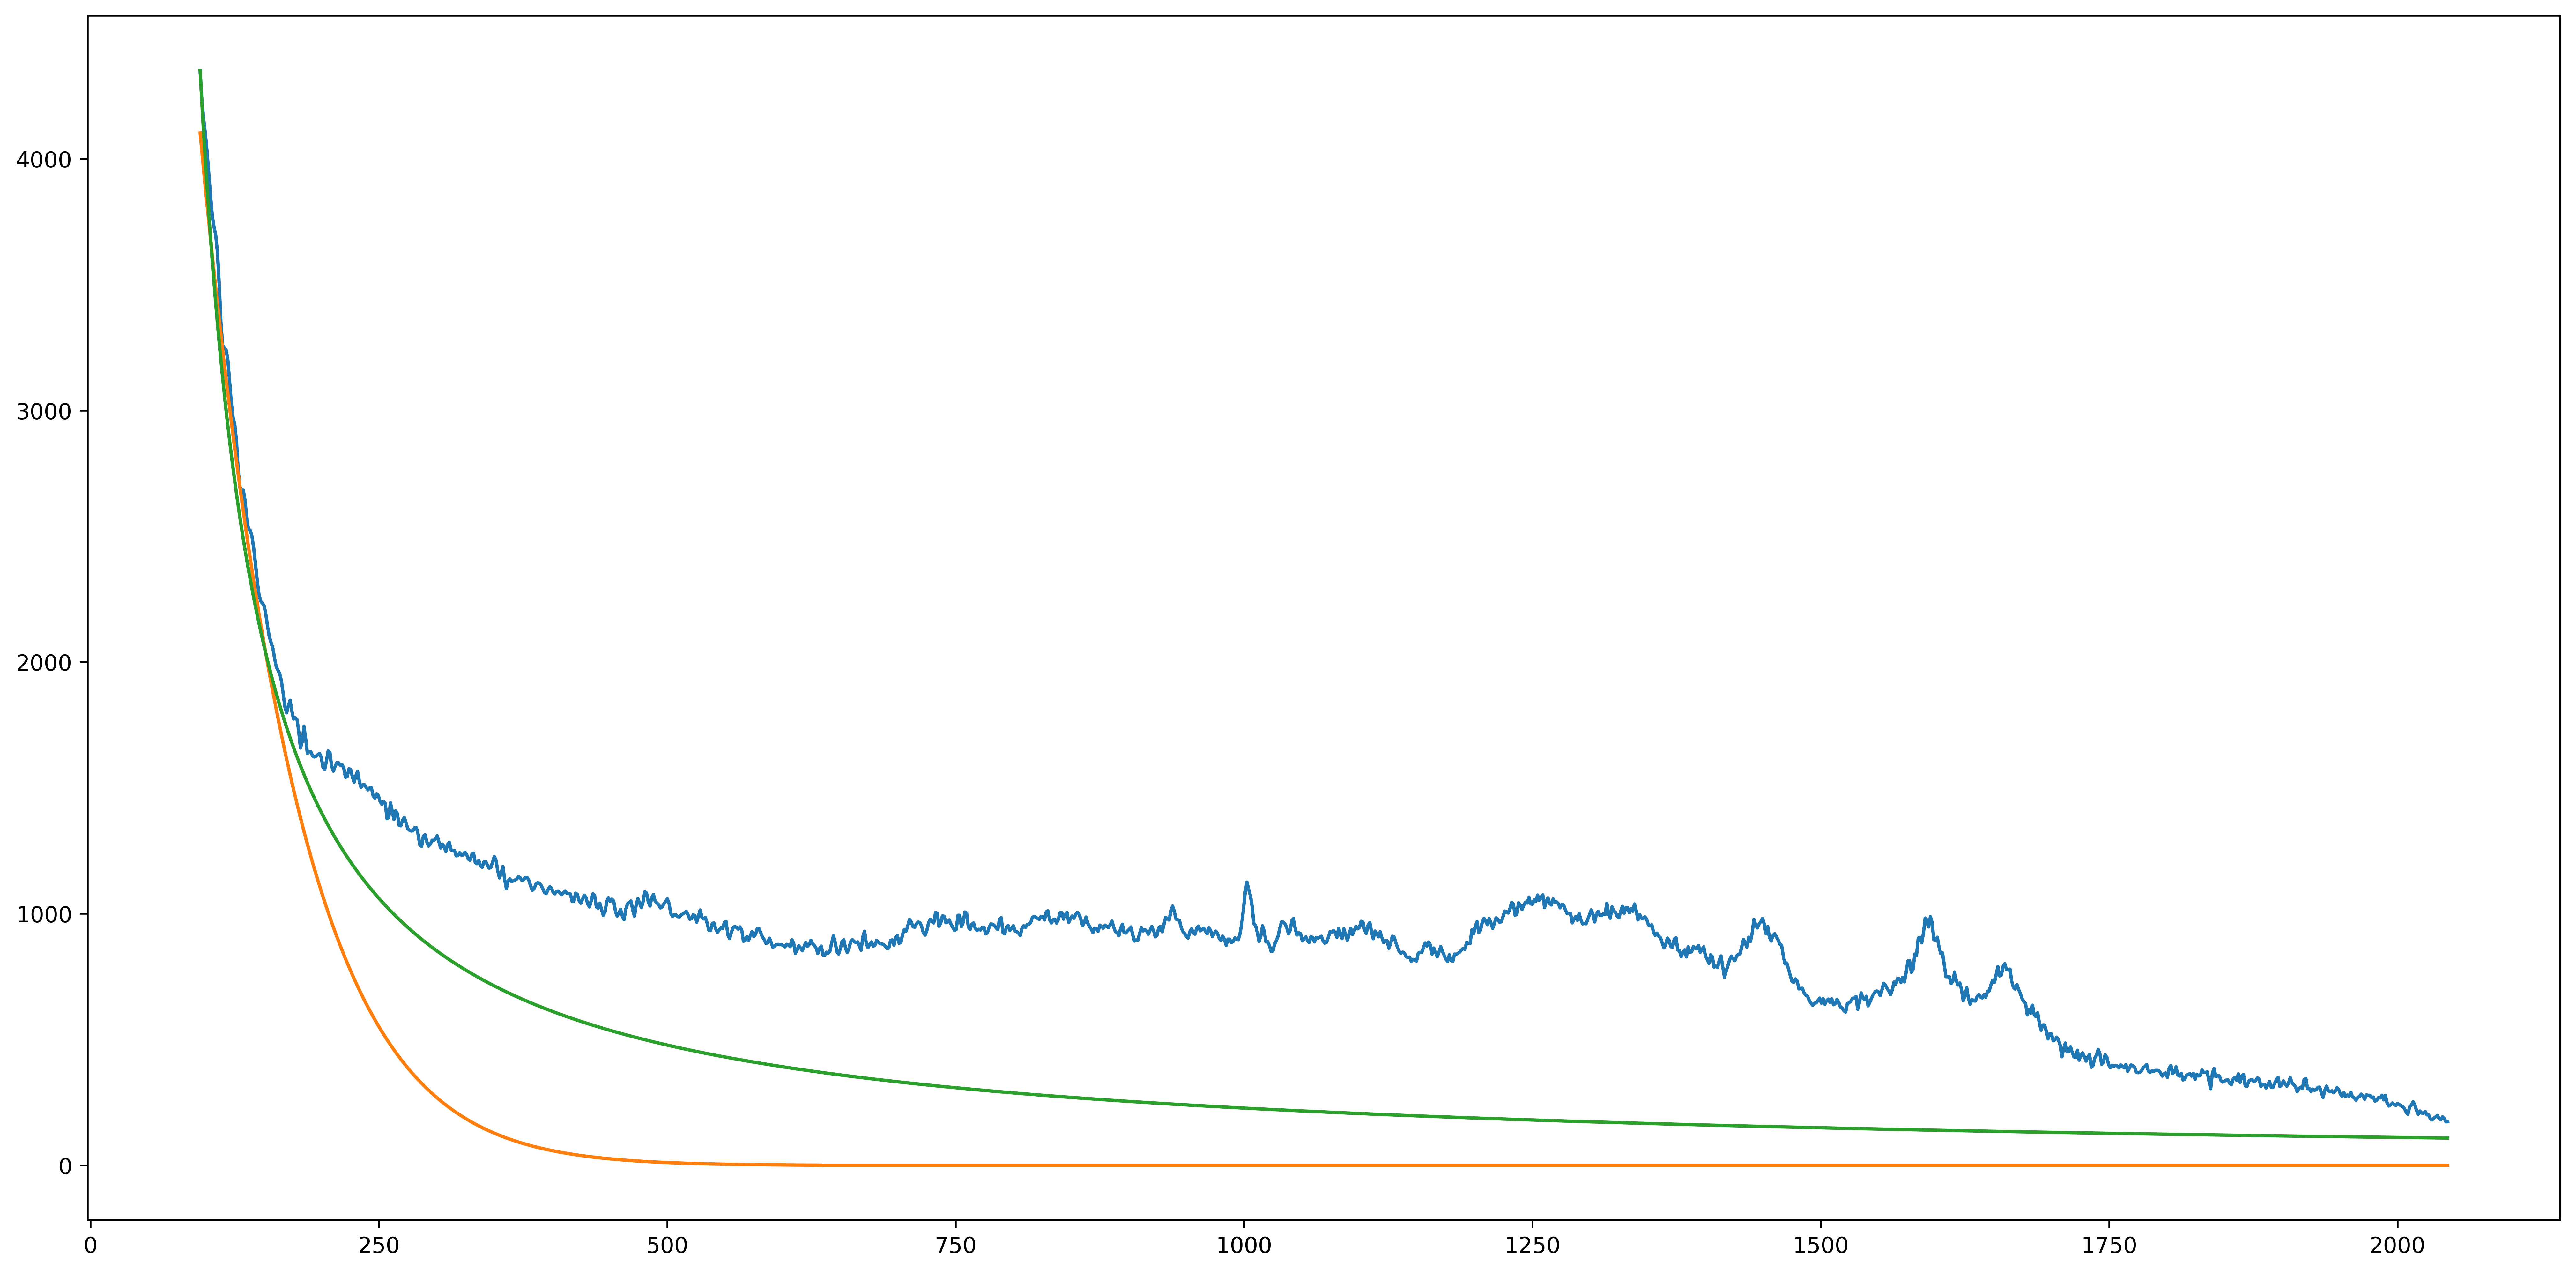

TypeError: cannot unpack non-iterable NoneType object

In [312]:
import timeit
from os import path

file_location2 = f"{'/'.join(file_location.split('/')[:-2])}/approximated/"
os.makedirs(file_location2, exist_ok=True)

shape = data[0][0].shape

for j, (f, img) in enumerate(zip(filenames, data)):   
    start = timeit.default_timer()
#     if path.exists(f'{file_location2}{f.split("/")[-1].split(".")[0]}_raman.npy'):
#         print(f'file already exist {file_location2}{f.split("/")[-1].split(".")[0]}_raman')
#         continue

#     if j < 7:
#         continue
    
    raman, photo = split_signal(img)

    stop = timeit.default_timer()
    print('Time: ', stop - start)  

    np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_raman', raman.reshape(shape))
    np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_photoluminescence', photo.reshape(shape))
    print(f"image: {f} is done.")

In [ ]:
x = np.linspace(0,10,200)
plt.axvline(mu, color='k')
plt.plot(x,exp(x))
plt.plot(x,exp2(x))
# plt.plot(x,gamma(x))
plt.plot(x,pareto(x))
plt.show()